In [168]:
import pandas as pd
from fbprophet import Prophet
pd.options.mode.chained_assignment = None
import numpy as np

In [169]:
USDdaily = pd.read_csv("../USDPLN_Candlestick_1_D_BID_01.11.2009-09.11.2019.csv")
APPLE = pd.read_csv("../AAPL.USUSD_Candlestick_1_D_BID_26.01.2017-09.11.2019.csv")
USDhourly = pd.read_csv("../USDPLN_Candlestick_1_Hour_BID_06.10.2009-02.11.2019.csv")
EURMonthly = pd.read_csv("../EURPLN_Candlestick_1_M_BID_19.08.2019-18.10.2019.csv")

In [170]:
USDdaily.tail()

,DateTime,Open,High,Low,Close,Volume
3657,05.11.2019 23:00:00.000 GMT+0100,3.84969,3.85785,3.84539,3.85305,57634.11
3658,06.11.2019 23:00:00.000 GMT+0100,3.85154,3.85756,3.84393,3.85115,79446.24
3659,07.11.2019 23:00:00.000 GMT+0100,3.85124,3.87265,3.85077,3.85936,57538.88
3660,08.11.2019 23:00:00.000 GMT+0100,3.85936,3.85936,3.85936,3.85936,0.00
3661,09.11.2019 23:00:00.000 GMT+0100,3.85936,3.85936,3.85936,3.85936,0.00


In [171]:
def get_open_data(df):
    df = df.iloc[:,0:2]
    df.columns = ["ds","y"]
    return df

In [172]:
def convert_dates(df):
    df['ds'].dtypes
    df['ds'] = pd.to_datetime(df['ds'], errors='ignore', utc=True)
    for i in np.array(df['ds'].index):
        df['ds'][i] = df['ds'][i].replace(tzinfo=None)
    return df

In [173]:
USDdaily = pd.read_csv("../USDPLN_Candlestick_1_D_BID_01.11.2009-09.11.2019.csv")

In [174]:
USDdaily = get_open_data(USDdaily)
# USDdaily = count_diff_DF(USDdaily)

In [175]:
from matplotlib import pyplot as plt

In [176]:

def predict_long_term(horizon, daily,offset=10):
    USDdaily = convert_dates(daily)
    USDdaily_train = USDdaily.iloc[:-horizon]
    USDdaily_test = USDdaily.iloc[-horizon:]
    m_USD_daily = Prophet(daily_seasonality=True)
    m_USD_daily.fit(USDdaily_train)
    future_USD_daily = m_USD_daily.make_future_dataframe(periods=horizon)
    forecast_USD_daily = m_USD_daily.predict(future_USD_daily)
    
    # plot overall prediction:
    size = np.array(daily['y']).shape[0]
    daily['y'].plot(label='reality')
    forecast_USD_daily['yhat'].plot(label='prediction')
    lo,hi = plt.ylim()
    plt.plot([size-horizon, size-horizon],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=2, label='actual prediction start')
    plt.legend()
    plt.title(f'overall prediction of whole dataset and {horizon} future days')
    plt.show()
    
    #plot absolute predictions
    plt.plot(range(0,horizon+offset),np.hstack([USDdaily_train['y'][-offset:],USDdaily_test['y']]),label='reality')
    plt.plot(range(0,horizon+offset),forecast_USD_daily['yhat'][-(horizon+offset):],label='prediction')
    lo,hi = plt.ylim()
    plt.plot([offset,offset],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=2, label='actual prediction start')
    plt.legend()
    plt.title(f'absolute value prediction for {offset} past and {horizon} future days')
    plt.show()
    
    #print delta:
    realdiff = np.array(USDdaily_test['y'])[0]-np.array(USDdaily_test['y'])[-1]
    predicteddiff = np.array(forecast_USD_daily['yhat'])[-horizon] - np.array(forecast_USD_daily['yhat'])[-1]  
    print(f"difference at the begining and the end of horizon is real:{realdiff}, predicted: {predicteddiff}")
    return forecast_USD_daily


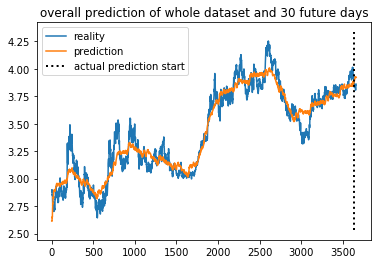

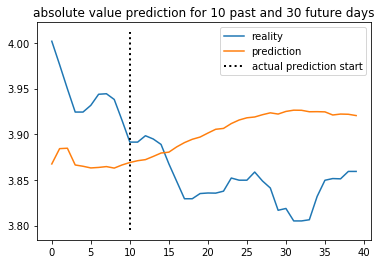

difference at the begining and the end of horizon is real:0.032090000000000174, predicted: -0.05136406623999745


In [177]:
fore =predict_long_term(30,USDdaily)

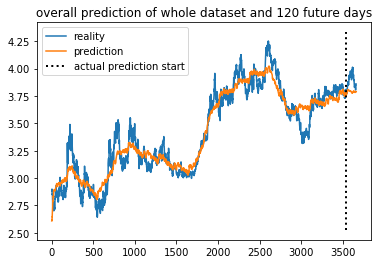

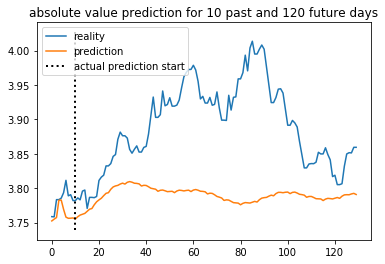

difference at the begining and the end of horizon is real:-0.07737999999999934, predicted: -0.03556322015207103


In [178]:
fore =predict_long_term(120,USDdaily)

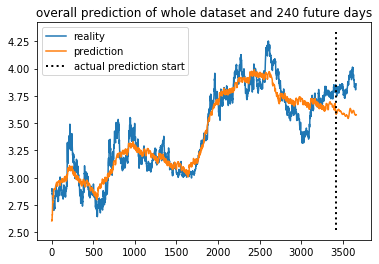

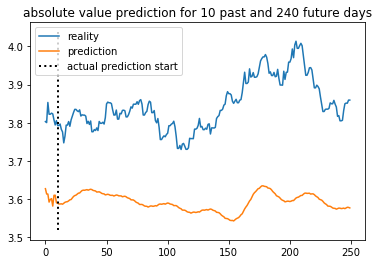

difference at the begining and the end of horizon is real:-0.0665799999999992, predicted: 0.012278269332260283


In [152]:
fore =predict_long_term(240,USDdaily)

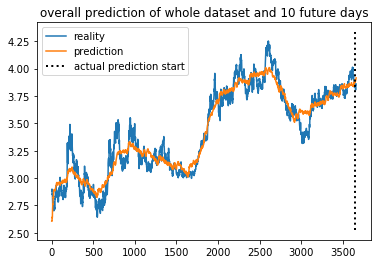

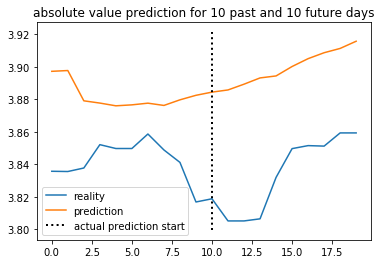

difference at the begining and the end of horizon is real:-0.04055999999999971, predicted: -0.03133897009533104


In [167]:
fore =predict_long_term(10,USDdaily)